<a href="https://colab.research.google.com/github/chanhyeong00/study_for_deep_learning_mini_project/blob/main/deep_learning_simple_project/iris_%EA%BD%83_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 데이터셋 전처리

In [2]:
dataset = pd.read_csv('IRIS.csv')

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
dataset.describe() # 나중에 scaling한 것과 비교하기 위함
# 값 - mean / std 로 표준화 할 수 있음
# 그러나 from sklearn.preprocessing import StandardScaler 으로 가능

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

In [6]:
X[:3], y[:3]

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2,
 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 Name: species, dtype: object)

### 훈련, 테스트 세트 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print(X_train[:3], y_train[:3])

     sepal_length  sepal_width  petal_length  petal_width
1             4.9          3.0           1.4          0.2
147           6.5          3.0           5.2          2.0
91            6.1          3.0           4.6          1.4 1          Iris-setosa
147     Iris-virginica
91     Iris-versicolor
Name: species, dtype: object


In [9]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [10]:
print(X_train[:3], y_train[:3])

[[4.9 3.  1.4 0.2]
 [6.5 3.  5.2 2. ]
 [6.1 3.  4.6 1.4]] ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']


In [11]:
label = np.unique(y)
print(label)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### 라벨링 하기(문자열이기 때문)

In [12]:
# 라벨링
for i in range(len(y_train)):
  for j in range(len(label)):
    if y_train[i] == label[j]:
      y_train[i] = j

for i in range(len(y_test)):
  for j in range(len(label)):
    if y_test[i] == label[j]:
      y_test[i] = j

**int형에서는 tensor로 전환이 안 되기 때문에 astype(np.float__)를 사용해서 float형으로 바꾸어준다.**

In [13]:
y_train = y_train.astype(np.float64) # 형태 맞춰주어야 한다.
y_test = y_test.astype(np.float64)

In [14]:
print(X_train[:3], y_train[:3], y_test)

[[4.9 3.  1.4 0.2]
 [6.5 3.  5.2 2. ]
 [6.1 3.  4.6 1.4]] [0. 2. 1.] [0. 1. 0. 1. 2. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 2. 0. 1. 0. 1. 2. 0. 1. 0.
 2. 2. 1. 0. 1. 2.]


In [15]:
X_train.shape

(120, 4)

In [16]:
print(type(X_train[0]), type(X_test[0]), type(y_train), type(y_train[0]), type(y_test[0]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'> <class 'numpy.float64'>


In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(None, 4)))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, validation_data = [X_test, y_test])

Epoch 1/500
4/4 [==============================] - 2s 207ms/step - loss: 0.9354 - accuracy: 0.5167 - val_loss: 0.9574 - val_accuracy: 0.2333
Epoch 2/500
4/4 [==============================] - 0s 31ms/step - loss: 0.8370 - accuracy: 0.5333 - val_loss: 0.8619 - val_accuracy: 0.3000
Epoch 3/500
4/4 [==============================] - 0s 45ms/step - loss: 0.7828 - accuracy: 0.5583 - val_loss: 0.8181 - val_accuracy: 0.2333
Epoch 4/500
4/4 [==============================] - 0s 26ms/step - loss: 0.7431 - accuracy: 0.5917 - val_loss: 0.7785 - val_accuracy: 0.4000
Epoch 5/500
4/4 [==============================] - 0s 28ms/step - loss: 0.7469 - accuracy: 0.4000 - val_loss: 0.7015 - val_accuracy: 0.7333
Epoch 6/500
4/4 [==============================] - 0s 65ms/step - loss: 0.6777 - accuracy: 0.7667 - val_loss: 0.6649 - val_accuracy: 0.9667
Epoch 7/500
4/4 [==============================] - 0s 36ms/step - loss: 0.6628 - accuracy: 0.8750 - val_loss: 0.6416 - val_accuracy: 0.8333
Epoch 8/500
4/4 [==

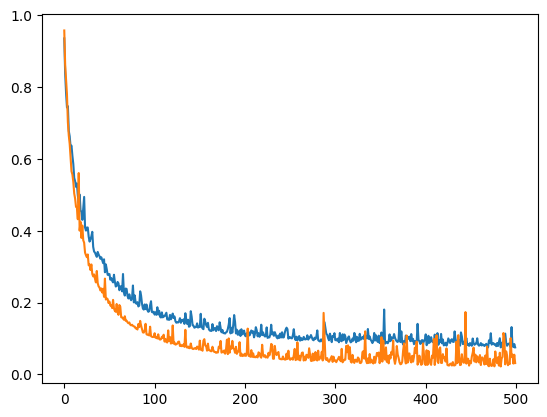

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

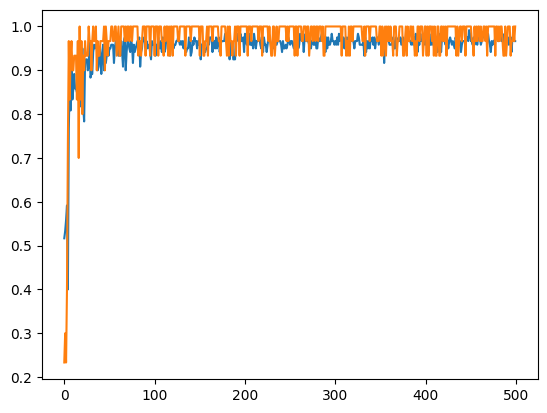

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [20]:
# 점수 시각화
print(model.evaluate(X_test, y_test))
print(model.evaluate(X_train, y_train))
# loss, accuacy

1/1 [==============================] - 0s 40ms/step - loss: 0.0314 - accuracy: 1.0000
[0.031442150473594666, 1.0]
4/4 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.9750
[0.07767994701862335, 0.9750000238418579]


과대적합이 좀 있다.

In [21]:
model.predict([[5, 3.0, 1.1, 0.5]]) # 예측 맞음

1/1 [==============================] - 0s 165ms/step


array([[9.9840802e-01, 1.5920262e-03, 7.9705769e-16]], dtype=float32)

### 콜백을 넣어서 한 번 해보자

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(None, 4)))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

check_pt = tf.keras.callbacks.ModelCheckpoint('best-model-call1.h5', save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), callbacks=[early, check_pt])

Epoch 1/500
4/4 [==============================] - 1s 122ms/step - loss: 1.9241 - accuracy: 0.3417 - val_loss: 1.5177 - val_accuracy: 0.2000
Epoch 2/500
4/4 [==============================] - 0s 39ms/step - loss: 1.2377 - accuracy: 0.3667 - val_loss: 1.2266 - val_accuracy: 0.2000
Epoch 3/500
1/4 [======>.......................] - ETA: 0s - loss: 1.1322 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 25ms/step - loss: 1.1205 - accuracy: 0.3667 - val_loss: 1.2523 - val_accuracy: 0.2000
Epoch 4/500
4/4 [==============================] - 0s 31ms/step - loss: 1.0597 - accuracy: 0.3250 - val_loss: 1.0983 - val_accuracy: 0.2000
Epoch 5/500
4/4 [==============================] - 0s 24ms/step - loss: 1.0134 - accuracy: 0.3500 - val_loss: 1.1223 - val_accuracy: 0.2000
Epoch 6/500
4/4 [==============================] - 0s 20ms/step - loss: 0.9752 - accuracy: 0.3417 - val_loss: 1.0148 - val_accuracy: 0.2333
Epoch 7/500
4/4 [==============================] - 0s 17ms/step - loss: 0.9490 - accuracy: 0.5167 - val_loss: 0.9964 - val_accuracy: 0.1000
Epoch 8/500
4/4 [==============================] - 0s 24ms/step - loss: 0.9048 - accuracy: 0.4083 - val_loss: 0.8584 - val_accuracy: 0.5667
Epoch 9/500
4/4 [==============================] - 0s 17ms/step - loss: 0.8677 - accuracy: 0.5167 - val_loss: 0.8554 - val_accuracy: 0.7000
Epoch 10/500
4/4 [==============

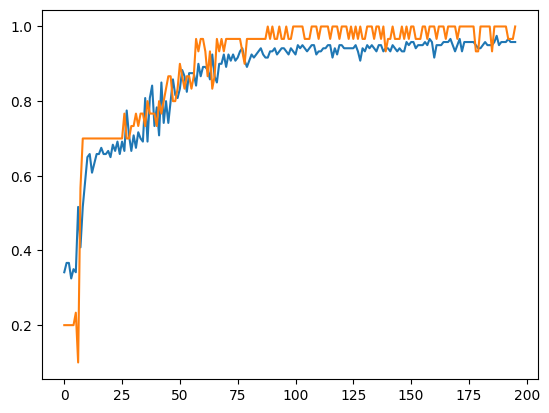

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

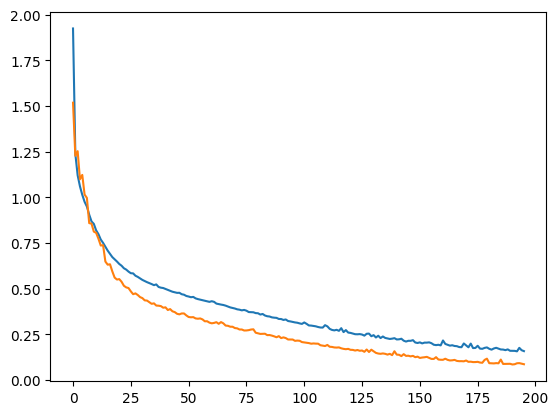

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [25]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

4/4 [==============================] - 0s 4ms/step - loss: 0.1572 - accuracy: 0.9667
[0.15719915926456451, 0.9666666388511658]
1/1 [==============================] - 0s 27ms/step - loss: 0.0843 - accuracy: 1.0000
[0.08430609852075577, 1.0]


진동은 줄고 과소적합이 생겼다.

스케일링을 해서도 해보겠다

### 데이터 스케일링

In [26]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

train_scaled = std.transform(X_train)
test_scaled = std.transform(X_test)

In [27]:
print(train_scaled[:3], test_scaled[:3])

[[-1.19819001 -0.0100254  -1.4589566  -1.41899332]
 [ 0.73665004 -0.0100254   0.74105732  0.96809824]
 [ 0.25294003 -0.0100254   0.3936867   0.17240106]] [[-0.95633501  1.19302217 -1.4589566  -1.41899332]
 [-0.23076999 -0.49124442  0.10421119  0.03978486]
 [-0.95633501  1.91485072 -1.34316639 -1.41899332]]


In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(None, 4)))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

check_pt = tf.keras.callbacks.ModelCheckpoint('best-model-call2.h5', save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, y_train, epochs=500, validation_data = (test_scaled, y_test), callbacks=[early, check_pt])

Epoch 1/500
4/4 [==============================] - 1s 82ms/step - loss: 1.4821 - accuracy: 0.2000 - val_loss: 1.6486 - val_accuracy: 0.1000
Epoch 2/500
4/4 [==============================] - 0s 24ms/step - loss: 1.2822 - accuracy: 0.2500 - val_loss: 1.4045 - val_accuracy: 0.1333
Epoch 3/500
4/4 [==============================] - 0s 17ms/step - loss: 1.1335 - accuracy: 0.3000 - val_loss: 1.2132 - val_accuracy: 0.2667
Epoch 4/500
1/4 [======>.......................] - ETA: 0s - loss: 1.1783 - accuracy: 0.2188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 19ms/step - loss: 1.0183 - accuracy: 0.3583 - val_loss: 1.0636 - val_accuracy: 0.4333
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 0.9269 - accuracy: 0.4500 - val_loss: 0.9389 - val_accuracy: 0.4667
Epoch 6/500
4/4 [==============================] - 0s 26ms/step - loss: 0.8518 - accuracy: 0.5417 - val_loss: 0.8399 - val_accuracy: 0.6333
Epoch 7/500
4/4 [==============================] - 0s 17ms/step - loss: 0.7913 - accuracy: 0.6167 - val_loss: 0.7605 - val_accuracy: 0.6667
Epoch 8/500
4/4 [==============================] - 0s 23ms/step - loss: 0.7427 - accuracy: 0.6417 - val_loss: 0.6963 - val_accuracy: 0.8000
Epoch 9/500
4/4 [==============================] - 0s 24ms/step - loss: 0.7018 - accuracy: 0.6833 - val_loss: 0.6455 - val_accuracy: 0.8667
Epoch 10/500
4/4 [==============================] - 0s 24ms/step - loss: 0.6676 - accuracy: 0.7083 - val_loss: 0.6032 - val_accuracy: 0.8667
Epoch 11/500
4/4 [=============

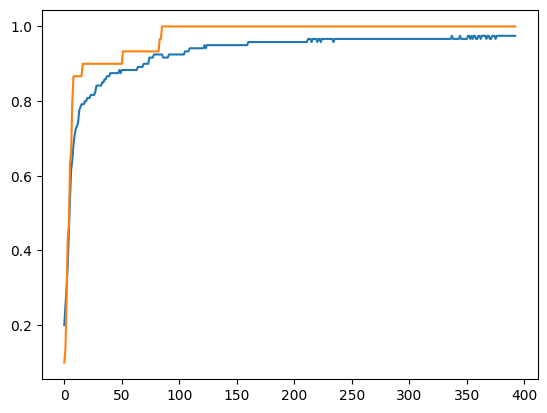

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

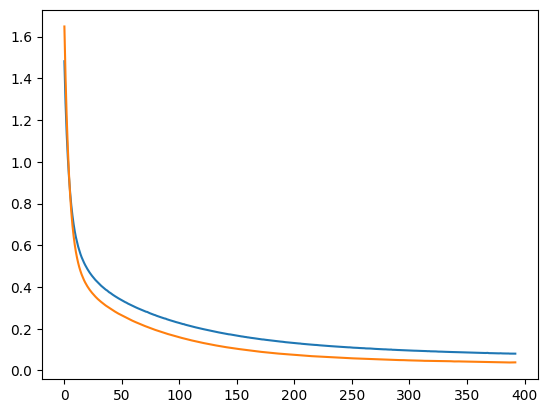

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [31]:
print(model.evaluate(train_scaled, y_train))
print(model.evaluate(test_scaled, y_test))

4/4 [==============================] - 0s 5ms/step - loss: 0.0807 - accuracy: 0.9750
[0.08070209622383118, 0.9750000238418579]
1/1 [==============================] - 0s 38ms/step - loss: 0.0384 - accuracy: 1.0000
[0.038415130227804184, 1.0]


스케일링 해서 과대적합도 줄고 그래프 모양이 더 좋아졌다(진동이 사라짐)

꽤 괜찮은 결과인 것 같다.